<a href="https://colab.research.google.com/github/Sejaldahal/object_detection/blob/main/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install opendatasets

In [ ]:
import opendatasets as od
od.download ("https://www.kaggle.com/datasets/gopalbhattrai/pascal-voc-2012-dataset")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sejaldahal
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/gopalbhattrai/pascal-voc-2012-dataset


100%|██████████| 3.52G/3.52G [00:34<00:00, 109MB/s]

In [ ]:
import os
import random
imagefolder = "/content/pascal-voc-2012-dataset/VOC2012_train_val/VOC2012_train_val/JPEGImages"
annotation_folder="/content/pascal-voc-2012-dataset/VOC2012_train_val/VOC2012_train_val/Annotations"
image_files=os.listdir(imagefolder)
random_image= random.choice(image_files)

In [ ]:
random_image

'2011_001198.jpg'

In [ ]:
image_path=os.path.join(imagefolder,random_image)
annotation_filename=random_image.replace(".jpg",".xml")
annotation_path=os.path.join(annotation_folder,annotation_filename)

In [ ]:
annotation_filename

'2011_001198.xml'

array([[[75, 86, 80],
        [58, 74, 64],
        [71, 78, 70],
        ...,
        [21, 11,  9],
        [20, 10,  9],
        [18,  8,  7]],

       [[68, 79, 71],
        [63, 76, 67],
        [70, 81, 73],
        ...,
        [20,  9,  7],
        [20,  9,  7],
        [20,  8,  8]],

       [[67, 74, 66],
        [68, 81, 72],
        [64, 88, 75],
        ...,
        [23, 12, 10],
        [24, 10,  9],
        [23,  9,  8]],

       ...,

       [[20, 10, 11],
        [27, 11, 12],
        [42, 16, 17],
        ...,
        [98, 23, 43],
        [95, 24, 42],
        [91, 22, 40]],

       [[19, 10, 11],
        [30, 14, 15],
        [35, 11, 11],
        ...,
        [89, 22, 39],
        [87, 23, 39],
        [83, 20, 37]],

       [[21, 11, 10],
        [30, 14, 14],
        [37, 11, 12],
        ...,
        [86, 19, 36],
        [85, 18, 35],
        [84, 17, 35]]], dtype=uint8)
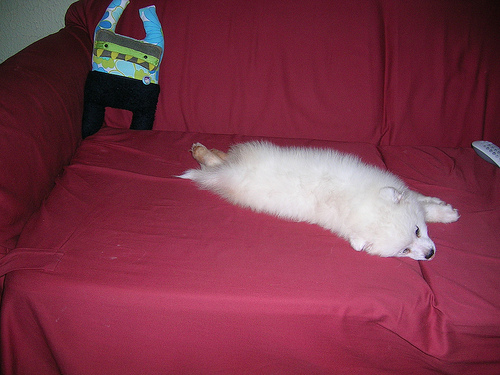

In [ ]:
import cv2
image=cv2.imread(image_path)
cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [ ]:
import xml.etree.ElementTree as ET

In [ ]:
# 5. Parse XML
tree = ET.parse(annotation_path)
root = tree.getroot()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

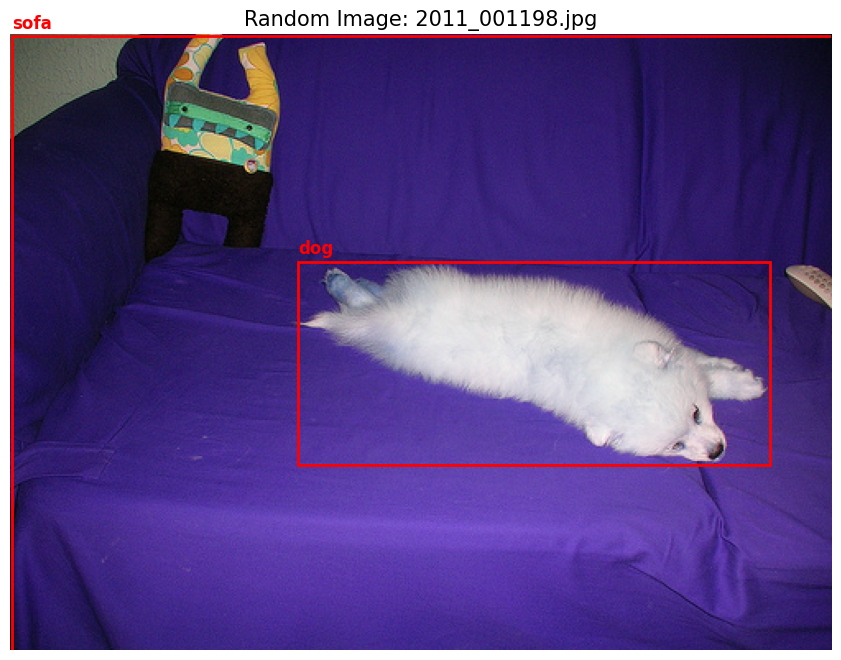

In [ ]:
# 6. Create plot
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(image)
## bounding box for image

# 7. Draw bounding boxes
for obj in root.findall('object'):
    label = obj.find('name').text
    bbox = obj.find('bndbox')

    xmin = int(float(bbox.find('xmin').text))
    ymin = int(float(bbox.find('ymin').text))
    xmax = int(float(bbox.find('xmax').text))
    ymax = int(float(bbox.find('ymax').text))

    width = xmax - xmin
    height = ymax - ymin

    rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

    plt.text(xmin, ymin - 5, label, color='red', fontsize=12, weight='bold')
plt.axis('off')
plt.title(f"Random Image: {random_image}", fontsize=15)
plt.show()

In [ ]:


import torch

if torch.cuda.is_available():
    print("✅ GPU is available. Using GPU:", torch.cuda.get_device_name(0))
else:
    print("❌ GPU not available. Using CPU.")

✅ GPU is available. Using GPU: Tesla T4


In [ ]:
import torchvision
model=torch.hub.load('ultralytics/yolov5','yolov5s',pretrained=True)



Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-5-30 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
import os
import shutil
import xml.etree.ElementTree as ET
from tqdm import tqdm

# Paths (update if needed)
base_dir = "pascal-voc-2012-dataset/VOC2012_train_val/VOC2012_train_val"
img_dir = os.path.join(base_dir, "JPEGImages")
ann_dir = os.path.join(base_dir, "Annotations")
image_sets = os.path.join(base_dir, "ImageSets/Main")

# Output directories
out_img_train = "dataset/images/train"
out_img_val = "dataset/images/val"
out_lbl_train = "dataset/labels/train"
out_lbl_val = "dataset/labels/val"

# Create directories
for d in [out_img_train, out_img_val, out_lbl_train, out_lbl_val]:
    os.makedirs(d, exist_ok=True)

# Class names
classes = ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
           'bus', 'car', 'cat', 'chair', 'cow',
           'diningtable', 'dog', 'horse', 'motorbike', 'person',
           'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

# Convert VOC XML annotation to YOLO format
def convert_voc_to_yolo(xml_file, txt_file, img_width, img_height):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    with open(txt_file, 'w') as f:
        for obj in root.findall('object'):
            cls_name = obj.find('name').text
            if cls_name not in classes:
                continue
            cls_id = classes.index(cls_name)

            bbox = obj.find('bndbox')
            xmin = int(bbox.find('xmin').text)
            ymin = int(bbox.find('ymin').text)
            xmax = int(bbox.find('xmax').text)
            ymax = int(bbox.find('ymax').text)

            # Convert to YOLO format
            x_center = ((xmin + xmax) / 2) / img_width
            y_center = ((ymin + ymax) / 2) / img_height
            width = (xmax - xmin) / img_width
            height = (ymax - ymin) / img_height

            f.write(f"{cls_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

# Process dataset
def process_list(split, out_img_dir, out_lbl_dir):
    with open(os.path.join(image_sets, f"{split}.txt")) as f:
        image_ids = f.read().strip().split()

    for img_id in tqdm(image_ids, desc=f"Processing {split}"):
        img_file = os.path.join(img_dir, f"{img_id}.jpg")
        xml_file = os.path.join(ann_dir, f"{img_id}.xml")

        # Copy image
        shutil.copy(img_file, os.path.join(out_img_dir, f"{img_id}.jpg"))

        # Get image size
        tree = ET.parse(xml_file)
        size = tree.getroot().find('size')
        width = int(size.find('width').text)
        height = int(size.find('height').text)

        # Convert annotation
        yolo_txt_file = os.path.join(out_lbl_dir, f"{img_id}.txt")
        convert_voc_to_yolo(xml_file, yolo_txt_file, width, height)

# Run for train and val sets
process_list("train", out_img_train, out_lbl_train)
process_list("val", out_img_val, out_lbl_val)



Processing val: 100%|██████████| 5823/5823 [00:09<00:00, 639.88it/s]


In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17483, done.
remote: Total 17483 (delta 0), reused 0 (delta 0), pack-reused 17483 (from 1)
Receiving objects: 100% (17483/17483), 16.58 MiB | 15.87 MiB/s, done.
Resolving deltas: 100% (11991/11991), done.


In [ ]:
%cd yolov5/

/content/yolov5


In [ ]:
!pip install -r requirements.txt

In [ ]:
with open("voc.yaml", "w") as f:
    f.write("""
train: ../dataset/images/train
val: ../dataset/images/val

nc: 20
names: ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
        'bus', 'car', 'cat', 'chair', 'cow',
        'diningtable', 'dog', 'horse', 'motorbike', 'person',
        'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']
""")

In [ ]:
import os
os.environ['WANDB_MODE'] = 'offline'

!python train.py --img 640 --batch 16 --epochs 10 --data voc.yaml --weights yolov5s.pt --name yolov5_voc

Streaming output truncated to the last 5000 lines.
        3/9      5.91G    0.05039    0.03645    0.02257        105        640:  11% 38/358 [00:14<02:05,  2.55it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        3/9      5.91G    0.05046    0.03649    0.02263         96        640:  11% 39/358 [00:14<01:51,  2.87it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        3/9      5.91G    0.05046     0.0366    0.02274        115        640:  11% 40/358 [00:15<02:07,  2.49it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        3/9      5.91G    0.05046 

In [ ]:
from torchvision import models
import torch
import torch.nn as nn

In [ ]:
# Save current state of the model manually (only needed if you're custom training)
torch.save(model.state_dict(), 'my_yolov5_model.pth')


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-5-30 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


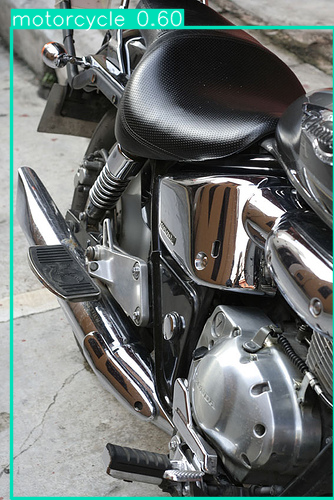

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5s.pt')
results = model('/content/pascal-voc-2012-dataset/VOC2012_test/VOC2012_test/JPEGImages/2008_000001.jpg')
results.show()
